# dekel tracks data extract

In [1]:
import spotipy
import json
import time
import sys
import pandas as pd
import numpy as np

In [2]:
from spotipy.oauth2 import SpotifyClientCredentials #To access authorised Spotify data
client_id = 'e2259109005e4bca90a98a851f042e7e'
client_secret = '7a39ee07c96d451298fa86308bd66ae0'

In [3]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

In [4]:
name = "dekel" #chosen artist
result = sp.search(name) #search query
result['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/5xnZNDl118VvPTvthujxpx'},
  'href': 'https://api.spotify.com/v1/artists/5xnZNDl118VvPTvthujxpx',
  'id': '5xnZNDl118VvPTvthujxpx',
  'name': 'Captain Hook',
  'type': 'artist',
  'uri': 'spotify:artist:5xnZNDl118VvPTvthujxpx'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/5QjwI21mbWUU3uiWtjM6Lc'},
  'href': 'https://api.spotify.com/v1/artists/5QjwI21mbWUU3uiWtjM6Lc',
  'id': '5QjwI21mbWUU3uiWtjM6Lc',
  'name': 'Dekel',
  'type': 'artist',
  'uri': 'spotify:artist:5QjwI21mbWUU3uiWtjM6Lc'}]

In [5]:
#Extract Artist's uri
artist_uri = 'spotify:artist:5QjwI21mbWUU3uiWtjM6Lc'

#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album')

#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])

In [6]:
album_uris

[]

In [7]:
album_names

[]

### get tracks ids

In [8]:
tids = []
t_names = []
for i, t in enumerate(result['tracks']['items']):
    print(' ', i, t['name'])
    t_names.append(t['name'])
    tids.append(t['uri'])

  0 The Power of Now - Dekel Remix
  1 No More Blues
  2 Dekel v rejvu
  3 Clear
  4 Technoaid
  5 Magneto
  6 Very Light Blue feat. Elran Dekel
  7 Odjebaný Dekel
  8 Raindrop
  9 You Don't Know What Love Is


In [9]:
t_names

['The Power of Now - Dekel Remix',
 'No More Blues',
 'Dekel v rejvu',
 'Clear',
 'Technoaid',
 'Magneto',
 'Very Light Blue feat. Elran Dekel',
 'Odjebaný Dekel',
 'Raindrop',
 "You Don't Know What Love Is"]

In [10]:
t_names = t_names[:6]
tids = tids[:6]

t_names
tids

['spotify:track:7rDhAqoPJ6gjbMhFO8QlBn',
 'spotify:track:5ysVy4xs1qyMqfYOKEh6Qh',
 'spotify:track:4mX3gf4UAE2joPcVvy57dB',
 'spotify:track:2JxBciAF6Vg15pdIgUJ1g6',
 'spotify:track:5JpJA7Pvrt96dMdfX0fViA',
 'spotify:track:7JkZzoSGyeImBpwZZEMd5i']

In [11]:
start = time.time()
features = sp.audio_features(tids)
delta = time.time() - start
print("time to get the data = ",delta)

time to get the data =  0.2973513603210449


In [12]:
len(features)

6

In [13]:
features[0]

{'danceability': 0.704,
 'energy': 0.773,
 'key': 7,
 'loudness': -9.525,
 'mode': 1,
 'speechiness': 0.0429,
 'acousticness': 0.00332,
 'instrumentalness': 0.877,
 'liveness': 0.107,
 'valence': 0.377,
 'tempo': 136.995,
 'type': 'audio_features',
 'id': '7rDhAqoPJ6gjbMhFO8QlBn',
 'uri': 'spotify:track:7rDhAqoPJ6gjbMhFO8QlBn',
 'track_href': 'https://api.spotify.com/v1/tracks/7rDhAqoPJ6gjbMhFO8QlBn',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7rDhAqoPJ6gjbMhFO8QlBn',
 'duration_ms': 529051,
 'time_signature': 4}

In [14]:
features[0]['danceability']

0.704

# check about popularity **************************

In [15]:
t_popularity = []
for track in tids:
    pop = sp.track(track)
    # pop is a dict with many attributes, we are interested at the moment in popularity
    t_popularity.append(pop['popularity'])

In [16]:
def get_tracks_features_into_dict(tracks_features):
    t_id = []
    t_danceability = []
    t_energy = []
    t_loudness = []
    t_speechiness = []
    t_acousticness = []
    t_instrumentalness = []
    t_liveness = []
    t_valence = []
    t_tempo = []
    t_duration_ms = []
    for i in range(len(t_names)):
        t_id.append(tracks_features[i]['id'])
        t_danceability.append(tracks_features[i]['danceability'])
        t_energy.append(tracks_features[i]['energy'])
        t_loudness.append(tracks_features[i]['loudness'])
        t_speechiness.append(tracks_features[i]['speechiness'])
        t_acousticness.append(tracks_features[i]['acousticness'])
        t_instrumentalness.append(tracks_features[i]['instrumentalness'])
        t_liveness.append(tracks_features[i]['liveness'])
        t_valence.append(tracks_features[i]['valence'])
        t_tempo.append(tracks_features[i]['tempo'])
        t_duration_ms.append(tracks_features[i]['duration_ms'])
    #create a dictionary    
    d = {'id':t_id,
         'danceability':t_danceability,
         'energy':t_energy,
         'loudness':t_loudness,
         'speechiness':t_speechiness,
         'acousticness':t_acousticness,
         'instrumentalness':t_instrumentalness,
         'liveness':t_liveness,
         'valence':t_valence,
         'tempo':t_tempo,
         'duration_ms':t_duration_ms
    }
    
    return d

In [17]:
songs_features_dict = get_tracks_features_into_dict(features)

In [18]:
songs_features_dict

{'id': ['7rDhAqoPJ6gjbMhFO8QlBn',
  '5ysVy4xs1qyMqfYOKEh6Qh',
  '4mX3gf4UAE2joPcVvy57dB',
  '2JxBciAF6Vg15pdIgUJ1g6',
  '5JpJA7Pvrt96dMdfX0fViA',
  '7JkZzoSGyeImBpwZZEMd5i'],
 'danceability': [0.704, 0.674, 0.817, 0.605, 0.756, 0.743],
 'energy': [0.773, 0.494, 0.797, 0.831, 0.498, 0.679],
 'loudness': [-9.525, -4.917, -5.644, -7.804, -10.105, -8.97],
 'speechiness': [0.0429, 0.0404, 0.165, 0.0353, 0.0865, 0.0596],
 'acousticness': [0.00332, 0.585, 0.14, 0.00113, 0.0635, 0.0253],
 'instrumentalness': [0.877, 5.22e-05, 0, 0.771, 0.726, 0.907],
 'liveness': [0.107, 0.605, 0.179, 0.0641, 0.0811, 0.0708],
 'valence': [0.377, 0.648, 0.448, 0.637, 0.14, 0.642],
 'tempo': [136.995, 134.072, 132.897, 140.03, 142.008, 141.981],
 'duration_ms': [529051, 288000, 151838, 360000, 569577, 459718]}

## create dataframe

In [19]:
df = pd.DataFrame(songs_features_dict)
df.head()

,id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,7rDhAqoPJ6gjbMhFO8QlBn,0.704,0.773,-9.525,0.0429,0.00332,0.877000,0.1070,0.377,136.995,529051
1,5ysVy4xs1qyMqfYOKEh6Qh,0.674,0.494,-4.917,0.0404,0.58500,0.000052,0.6050,0.648,134.072,288000
2,4mX3gf4UAE2joPcVvy57dB,0.817,0.797,-5.644,0.1650,0.14000,0.000000,0.1790,0.448,132.897,151838
3,2JxBciAF6Vg15pdIgUJ1g6,0.605,0.831,-7.804,0.0353,0.00113,0.771000,0.0641,0.637,140.030,360000
4,5JpJA7Pvrt96dMdfX0fViA,0.756,0.498,-10.105,0.0865,0.06350,0.726000,0.0811,0.140,142.008,569577


In [20]:
df.insert(11, "popularity", pd.Series(t_popularity) , True) 

# we define ourselves the tracks types based on our knowledge

In [21]:
df.insert(12, "track_type", 'deep psy' , True)
df = df.set_index('id')

In [22]:
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,track_type
id,,,,,,,,,,,,
7rDhAqoPJ6gjbMhFO8QlBn,0.704,0.773,-9.525,0.0429,0.00332,0.877000,0.1070,0.377,136.995,529051,43,deep psy
5ysVy4xs1qyMqfYOKEh6Qh,0.674,0.494,-4.917,0.0404,0.58500,0.000052,0.6050,0.648,134.072,288000,36,deep psy
4mX3gf4UAE2joPcVvy57dB,0.817,0.797,-5.644,0.1650,0.14000,0.000000,0.1790,0.448,132.897,151838,10,deep psy
2JxBciAF6Vg15pdIgUJ1g6,0.605,0.831,-7.804,0.0353,0.00113,0.771000,0.0641,0.637,140.030,360000,22,deep psy
5JpJA7Pvrt96dMdfX0fViA,0.756,0.498,-10.105,0.0865,0.06350,0.726000,0.0811,0.140,142.008,569577,24,deep psy
7JkZzoSGyeImBpwZZEMd5i,0.743,0.679,-8.970,0.0596,0.02530,0.907000,0.0708,0.642,141.981,459718,26,deep psy


In [23]:
df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.716500,0.678667,-7.827500,0.071617,0.136375,0.546842,0.184500,0.482000,137.997167,393030.666667,26.833333
std,0.073154,0.150233,2.126643,0.049405,0.225797,0.428737,0.210225,0.203138,3.962653,157742.643350,11.496376
min,0.605000,0.494000,-10.105000,0.035300,0.001130,0.000000,0.064100,0.140000,132.897000,151838.000000,10.000000
25%,0.681500,0.543250,-9.386250,0.041025,0.008815,0.181539,0.073375,0.394750,134.802750,306000.000000,22.500000
50%,0.723500,0.726000,-8.387000,0.051250,0.044400,0.748500,0.094050,0.542500,138.512500,409859.000000,25.000000
75%,0.752750,0.791000,-6.184000,0.079775,0.120875,0.850500,0.161000,0.640750,141.493250,511717.750000,33.500000
max,0.817000,0.831000,-4.917000,0.165000,0.585000,0.907000,0.605000,0.648000,142.008000,569577.000000,43.000000


# DISTRIBUTIONS

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
sns.set()

# GET CURRENT SIZE
fig_size = plt.rcParams['figure.figsize']

In [26]:
fig_size

[6.0, 4.0]

In [27]:
# SET WIDTH AND HEIGHT
fig_size[0] = 14
fig_size[1] = 9
plt.rcParams['figure.figsize'] = fig_size

###  duration ms dist

C:\Users\orenz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'duration_min')

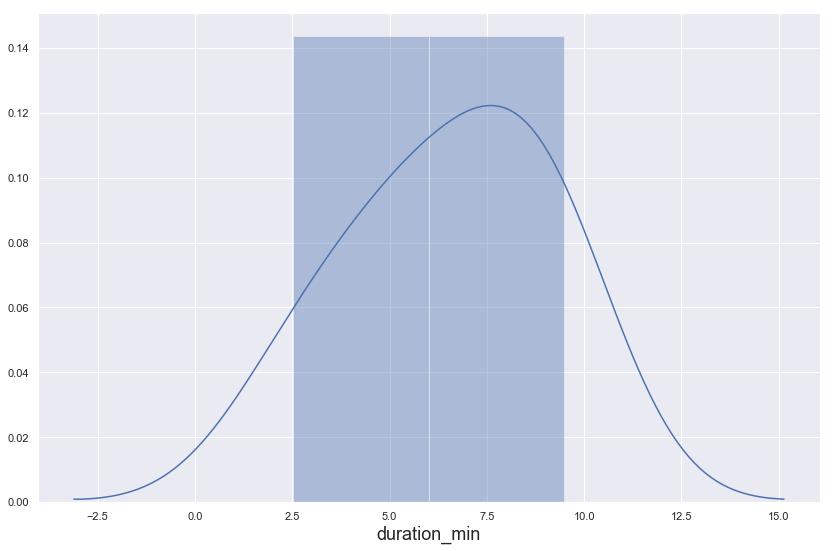

In [28]:
sns.distplot((df.duration_ms/1000.0)/60.0)
plt.xlabel('duration_min',fontsize=18)

### other features distributions

C:\Users\orenz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


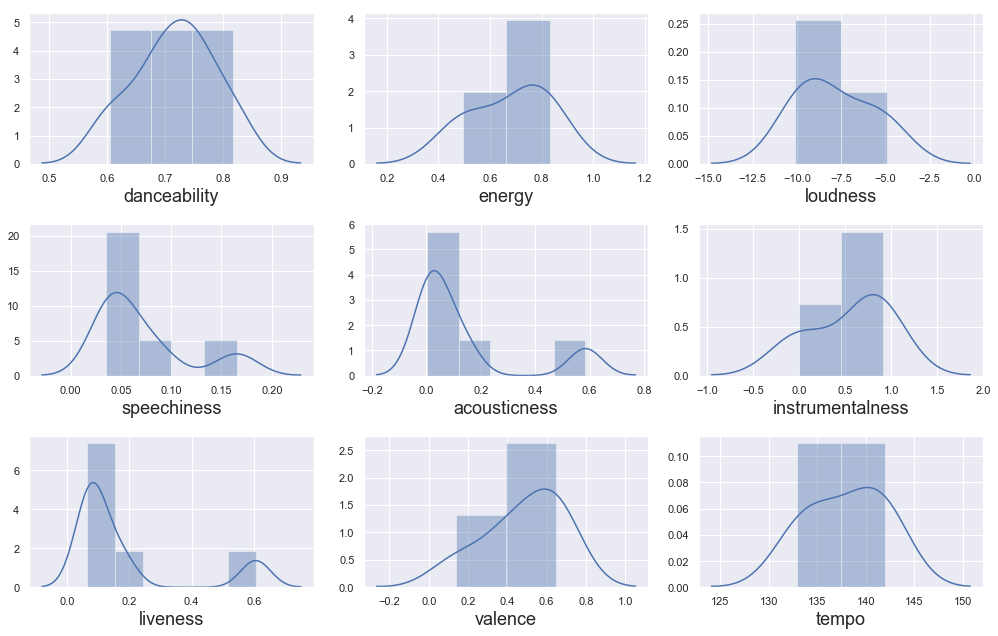

In [29]:
plt.subplot(331)
sns.distplot(df.danceability)
plt.xlabel('danceability', fontsize=18)

plt.subplot(332)
sns.distplot(df.energy)
plt.xlabel('energy', fontsize=18)

plt.subplot(333)
sns.distplot(df.loudness)
plt.xlabel('loudness', fontsize=18)

plt.subplot(334)
sns.distplot(df.speechiness)
plt.xlabel('speechiness', fontsize=18)

plt.subplot(335)
sns.distplot(df.acousticness)
plt.xlabel('acousticness', fontsize=18)

plt.subplot(336)
sns.distplot(df.instrumentalness)
plt.xlabel('instrumentalness', fontsize=18)

plt.subplot(337)
sns.distplot(df.liveness)
plt.xlabel('liveness', fontsize=18)

plt.subplot(338)
sns.distplot(df.valence)
plt.xlabel('valence', fontsize=18)

plt.subplot(339)
sns.distplot(df.tempo)
plt.xlabel('tempo', fontsize=18)

plt.tight_layout()
plt.show()


In [30]:
df.to_csv('dekel_tracks_data.csv')